## Курсовая работа


Перед вами стоит задача – подготовить аналитический отчет для HR-отдела. На основании проведенной аналитики предполагается составить рекомендации для отдела кадров по стратегии набора персонала, а также по взаимодействию с уже имеющимися сотрудниками.
<br><br> В базе данных лежит набор таблиц, которые содержат данные о сотрудниках вымышленной компании.
Сделайте обзор штата сотрудников компании. Составьте набор предметов исследования, а затем проверьте их на данных. Вся аналитика должна быть выполена с помощью SQL. Впоследствии данные можно визуализировать, однако финальные датафреймы для графиков также должны быть подготовлены с помощью SQL. <br><br>

Примеры гипотез:
1. Есть зависимость между `perfomance score` и тем, под чьим руководством работает сотрудник.
2. Есть зависимость между продолжительностью работы в компании и семейным положением сотрудника.
2. Есть зависимость между продолжительностью работы в компании и возрастом сотрудника.

<br><br>
Параметры для подключения следующие: хост – `dsstudents.skillbox.ru`, порт – `5432`, имя базы данных – `human_resources`, пользователь – `readonly`, пароль – `6hajV34RTQfmxhS`. Таблицы, доступные для анализа, – `hr_dataset`, `production_staff`, `recruiting_costs`, `salary_grid`.

In [2]:
#pip install psycopg2

In [3]:
import psycopg2
import sqlalchemy
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#import matplotlib.patches as mpatches
#import matplotlib as mpl
from datetime import datetime, timedelta
import numpy as np
import requests
import seaborn as sns




In [4]:
host = 'dsstudents.skillbox.ru'
port = 5432
dbname = 'human_resources'
user = 'readonly'
password = '6hajV34RTQfmxhS'

In [5]:
# для подключения к БД используем параметры для подключения
conn = f'postgresql+psycopg2://{user}:{password}@{host}:{port}/{dbname}'
engine = sqlalchemy.create_engine(conn)
connect = engine.connect()

In [6]:
inspector = sqlalchemy.inspect(engine)
inspector.get_table_names()

['hr_dataset', 'production_staff', 'recruiting_costs', 'salary_grid']

In [7]:
# загрузим содержимое SQL-таблицы в DataFrame и Выведим первые пять строк DataFrame на экран для предварительного анализа. 
pd.read_sql('''SELECT DISTINCT "Employment Status" FROM hr_dataset LIMIT 5''', connect)


,Employment Status
0,Future Start
1,Voluntarily Terminated
2,Active
3,Terminated for Cause
4,Leave of Absence


In [8]:
pd.read_sql("SELECT * FROM hr_dataset LIMIT 5", connect)

,id,Employee Name,Employee Number,marriedid,maritalstatusid,genderid,empstatus_id,deptid,perf_scoreid,age,...,Date of Hire,Days Employed,Date of Termination,Reason For Term,Employment Status,department,position,Manager Name,Employee Source,Performance Score
0,1,"Brown, Mia",1103024456,1,1,0,1,1,3,30,...,2008-10-27,3317,None,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Diversity Job Fair,Fully Meets
1,2,"LaRotonda, William",1106026572,0,2,1,1,1,3,34,...,2014-01-06,1420,None,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Website Banner Ads,Fully Meets
2,3,"Steans, Tyrone",1302053333,0,0,1,1,1,3,31,...,2014-09-29,1154,None,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Internet Search,Fully Meets
3,4,"Howard, Estelle",1211050782,1,1,0,1,1,9,32,...,2015-02-16,58,2015-04-15,N/A - still employed,Active,Admin Offices,Administrative Assistant,Brandon R. LeBlanc,Pay Per Click - Google,N/A- too early to review
4,5,"Singh, Nan",1307059817,0,0,0,1,1,9,30,...,2015-05-01,940,None,N/A - still employed,Active,Admin Offices,Administrative Assistant,Brandon R. LeBlanc,Website Banner Ads,N/A- too early to review


In [9]:
pd.read_sql("SELECT * FROM production_staff LIMIT 5", connect)

,id,Employee Name,Race Desc,Date of Hire,TermDate,Reason for Term,Employment Status,Department,Position,Pay,Manager Name,Performance Score,Abutments/Hour Wk 1,Abutments/Hour Wk 2,Daily Error Rate,90-day Complaints
0,1,"Albert, Michael",White,2011-08-01,None,N/A - still employed,Active,Production,Production Manager,$54.50,Elisa Bramante,Fully Meets,0,0,0,0
1,2,"Bozzi, Charles",Asian,2013-09-30,2014-08-07,retiring,Voluntarily Terminated,Production,Production Manager,$50.50,Elisa Bramante,Fully Meets,0,0,0,0
2,3,"Butler, Webster L",White,2016-01-28,None,N/A - still employed,Active,Production,Production Manager,$55.00,Elisa Bramante,Exceeds,0,0,0,0
3,4,"Dunn, Amy",White,2014-09-18,None,N/A - still employed,Active,Production,Production Manager,$51.00,Elisa Bramante,Fully Meets,0,0,0,0
4,5,"Gray, Elijiah",White,2015-06-02,None,N/A - still employed,Active,Production,Production Manager,$54.00,Elisa Bramante,Fully Meets,0,0,0,0


In [10]:
pd.read_sql("SELECT * FROM salary_grid LIMIT 5", connect)

,id,Position,Salary Min,Salary Mid,Salary Max,Hourly Min,Hourly Mid,Hourly Max
0,1,Administrative Assistant,30000,40000,50000,14.42,19.23,24.04
1,2,Sr. Administrative Assistant,35000,45000,55000,16.83,21.63,26.44
2,3,Accountant I,42274,51425,62299,20.32,24.72,29.95
3,4,Accountant II,50490,62158,74658,24.27,29.88,35.89
4,5,Sr. Accountant,63264,76988,92454,30.42,37.01,44.45


Посмотрим на ранжирование рейтинговых оценок по соответствию "perf_scoreid" с "Performance Score".

In [11]:
pd.read_sql('''SELECT DISTINCT "perf_scoreid", "Performance Score" from hr_dataset WHERE "perf_scoreid" > 0 ORDER BY perf_scoreid''', conn)

,perf_scoreid,Performance Score
0,1,PIP
1,2,Needs Improvement
2,3,Fully Meets
3,4,Exceeds
4,5,Exceptional
5,9,N/A- too early to review


# Определение зависимостей ключевых метрик эффективности от семейного положения сотрудников¶.


## * Зависимость между продолжительностью работы в компании и семейным положением сотрудника

In [12]:
time_marit = pd.read_sql(""" 
                        SELECT maritaldesc, 
                        AVG(CASE WHEN "genderid"='1' THEN "Days Employed" ELSE NULL END) AS men,
                        AVG(CASE WHEN "genderid"='0' THEN "Days Employed" ELSE NULL END) AS women
                        FROM hr_dataset
                        GROUP BY maritaldesc
                        ORDER BY maritaldesc
                        """, conn)
time_marit

,maritaldesc,men,women
0,Divorced,1297.642857,932.437500
1,Married,1125.352941,1331.861111
2,Separated,2677.666667,1378.666667
3,Single,1334.852459,1403.171053
4,Widowed,1071.000000,655.000000


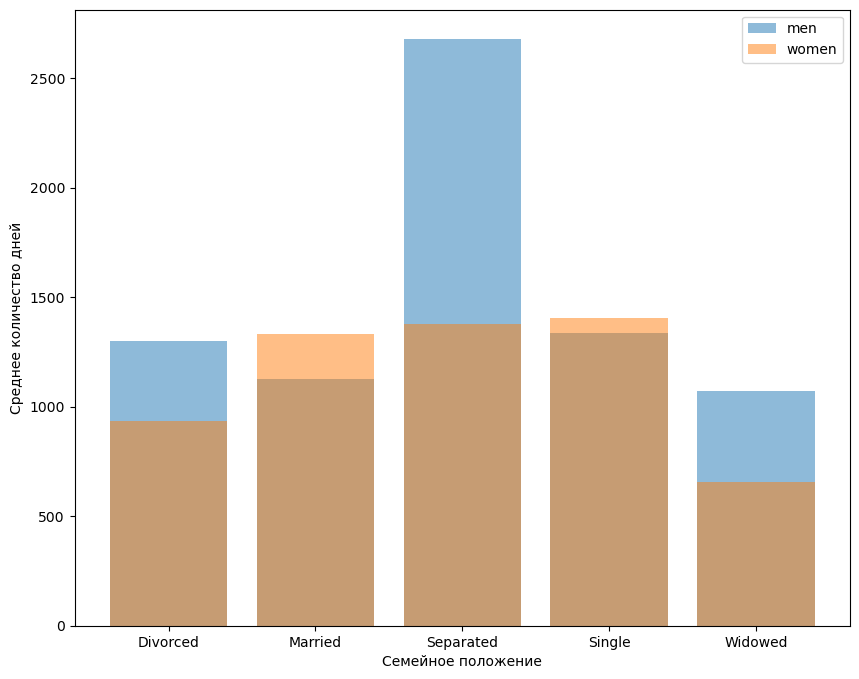

In [13]:
fig, ax = plt.subplots(figsize = (10,8))
ax.bar(time_marit.maritaldesc, time_marit.men, label = 'men', alpha = .5)
ax.bar(time_marit.maritaldesc, time_marit.women, label = 'women', alpha= .5)
ax.set_ylabel('Среднее количество дней')
ax.set_xlabel('Семейное положение')
plt.legend()
plt.show()

Сильное отклонение средних показателей для separated, для мужчин. Проверим на наличие выбросов.

In [14]:
pd.read_sql_query('''SELECT maritaldesc, "Days Employed" 
                     FROM hr_dataset 
                     WHERE "genderid"='1' 
                     AND "maritaldesc"='Separated' 
                     ORDER BY "Days Employed" ''', conn)

,maritaldesc,Days Employed
0,Separated,1658
1,Separated,2036
2,Separated,4339


В группе мужчин проживающих отдельно всего 3 работника, но даже наименьшее количество дней из них превышает все остальные средние значения на графике.

## Вывод
* Для мужчин, живущих отдельно, более характерна долгая продолжительность работы в компании

* Наименьшее среднее у женатых мужчин и вдовцов.

* У женщин не наблюдается ярко выраженных отклонений средних значений. Сниженный показатель наблюдается у разведенных женщин и вдов.

## * Зависимость количества увольнений от семейного положения в процентах

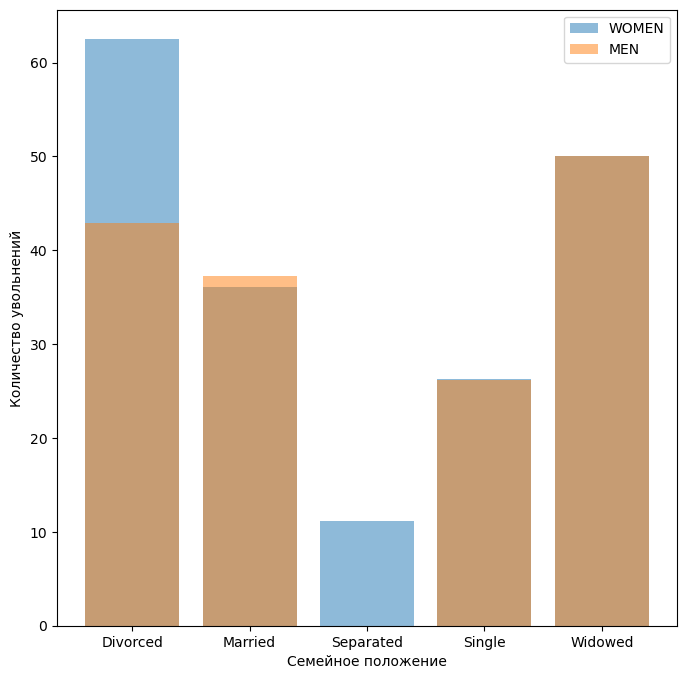

In [15]:
percent_term_gen = pd.read_sql_query('''SELECT maritaldesc, 
                                    sum(CASE WHEN "genderid"='1' AND "Employment Status" IN ('Voluntarily Terminated', 'Terminated for Cause') THEN 1 ELSE 0 END)*100.0/
                                    sum(CASE WHEN "genderid"='1' THEN 1 ELSE 0 END)
                                    AS men, 
                                    sum(CASE WHEN "genderid"='0' AND "Employment Status" IN ('Voluntarily Terminated', 'Terminated for Cause') THEN 1 ELSE 0 END)*100.0/
                                    sum(CASE WHEN "genderid"='0' THEN 1 ELSE 0 END)
                                    AS women 
                                    FROM hr_dataset 
                                    GROUP BY maritaldesc  
                                    ORDER BY maritaldesc ''', conn)

fig, ax = plt.subplots(figsize=(8,8))
ax.bar(percent_term_gen.maritaldesc, percent_term_gen.women, alpha=.5, label = 'WOMEN')
ax.bar(percent_term_gen.maritaldesc, percent_term_gen.men, alpha=.5, label = 'MEN')
ax.set_ylabel('Количество увольнений')
ax.set_xlabel('Семейное положение')
plt.legend()
plt.show()

## Вывод
Наименьшее число процентов увольнений у группы сотрудников живущих отдельно, наибольшие значения имеют группы разведенных, причем у женщин наблюдается заметное превышение над значением у мужчин, и супругов являющихся вдовами и вдовцами.

## * Зависимость performance score от семейного положения 

Посмотрим на ранжирование рейтинговых оценок по соответствию "perf_scoreid" с "Performance Score".

In [16]:
pd.read_sql('''SELECT DISTINCT "perf_scoreid", "Performance Score" from hr_dataset ORDER BY perf_scoreid''', conn)

,perf_scoreid,Performance Score
0,0,90-day meets
1,1,PIP
2,2,Needs Improvement
3,3,Fully Meets
4,4,Exceeds
5,5,Exceptional
6,9,N/A- too early to review


Для эффективной оценки необходимо исключить из рассмотрения данные с Performance Score равные 90-day meets и N/A- too early to review

In [17]:
perf_merit = pd.read_sql('''
                        SELECT "maritaldesc",
                        AVG(CASE WHEN "genderid" = 1 THEN "perf_scoreid" ELSE NULL END) AS men,
                        AVG(CASE WHEN "genderid" = 0 THEN "perf_scoreid" ELSE NULL END) AS women
                        FROM hr_dataset
                        WHERE "perf_scoreid" != 9 
                        AND "perf_scoreid" != 0 
                        GROUP BY "maritaldesc" ORDER BY "maritaldesc" 
                        ''',conn)
perf_merit

,maritaldesc,men,women
0,Divorced,3.166667,3.181818
1,Married,2.850000,3.074074
2,Separated,3.333333,2.875000
3,Single,3.056604,3.105263
4,Widowed,4.000000,3.000000


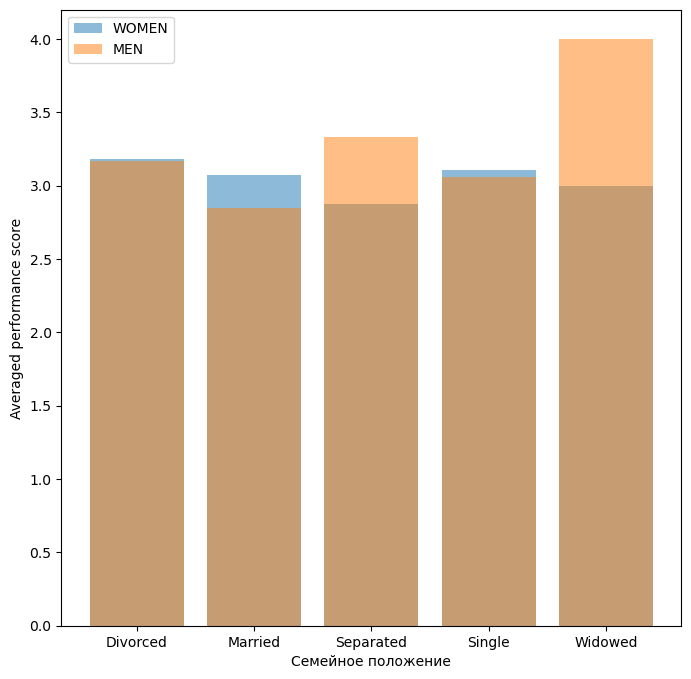

In [18]:
fig, ax = plt.subplots(figsize=(8,8))
ax.bar(perf_merit.maritaldesc, perf_merit.women, alpha=.5, label = 'WOMEN')
ax.bar(perf_merit.maritaldesc, perf_merit.men, alpha=.5, label = 'MEN')
ax.set_ylabel('Averaged performance score')
ax.set_xlabel('Семейное положение')
plt.legend()
plt.show()

## Вывод:
* Наибольшее среднее значение performance score наблюдается для мужчин-вдовцов и мужчин, живущих отдельно. Наименьшее значение наблюдается для мужчин в разводе.
* У женщин колебания метрики менее значительны и находятся близко к значению 3.

# Исследование зависимостей метрик эффективности от возраста сотрудника

## * Зависимость количества увольнений от возраста в процентах

In [19]:
age_term = pd.read_sql('''
                        SELECT age,
                        COUNT("Date of Termination")/(COUNT("Employee Number")*1.0)*100 AS percent,
                        COUNT("Employee Number") AS total
                        FROM hr_dataset
                        GROUP BY age
                        ORDER BY age
                        ''', conn)
age_term

,age,percent,total
0,25,0.000000,2
1,26,50.000000,2
2,27,20.000000,5
3,28,25.000000,12
4,29,20.000000,15
5,30,40.000000,15
6,31,32.000000,25
7,32,41.666667,12
8,33,35.294118,17
9,34,36.842105,19


Построим график зависимости процента увольнений от возраста сотрудников, обозначив общее количество сотрудников в данной возрастной категории  

C:\Users\MIKHAIL\AppData\Local\Temp\ipykernel_24800\4009140040.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


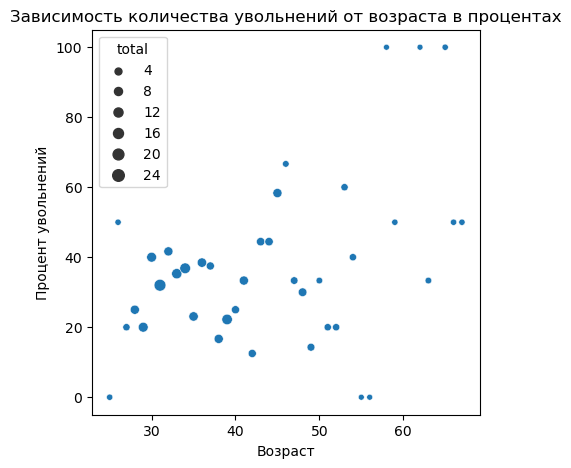

In [20]:
fig, ax = plt.subplots(figsize = (5,5))
sns.scatterplot(data=age_term, x='age',y='percent', size='total', ax=ax)
ax.set_xlabel('Возраст')
ax.set_ylabel('Процент увольнений')
ax.set_title('Зависимость количества увольнений от возраста в процентах')
fig.show()

Очевидной зависимости не наблюдается. На графике видны 3 случая 100% увольняемости, в возрасте более 58 и более лет, что скорее всего связано с выходом сотрудников на пенсию.

## * Количество увольнений по группам возрастов.

In [21]:
data_group_age_men = pd.read_sql('''(SELECT 
                     '20-34' AS group_age, 
                     count("Date of Termination")/(count("Employee Number")*1.0)*100 AS Percents
                     FROM hr_dataset
                     WHERE age < 35 AND genderid = 1
                     GROUP BY group_age)
                     UNION
                     (SELECT '35-44' AS group_age, 
                     count("Date of Termination")/(count("Employee Number")*1.0)*100 AS Percents
                     FROM hr_dataset
                     WHERE age >= 35 AND age < 45 AND genderid = 1
                     GROUP BY group_age)
                     UNION
                     (SELECT '45-54' AS group_age, 
                     count("Date of Termination")/(count("Employee Number")*1.0)*100 AS Percents
                     FROM hr_dataset
                     WHERE age >= 45 AND age < 55 AND genderid = 1
                     GROUP BY group_age)
                     UNION
                     (SELECT '55-64' AS group_age, 
                     count("Date of Termination")/(count("Employee Number")*1.0)*100 AS Percents
                     FROM hr_dataset
                     WHERE age >= 55 AND age < 65 AND genderid = 1
                     GROUP BY group_age)
                     UNION
                     (SELECT '>65' AS group_age, 
                     count("Date of Termination")/(count("Employee Number")*1.0)*100 AS Percents
                     FROM hr_dataset
                     WHERE age >= 65 AND genderid = 1
                     GROUP BY group_age)
                     ORDER BY group_age
                     ''', conn)

data_group_age_women = pd.read_sql('''(SELECT 
                     '20-34' AS group_age, 
                     count("Date of Termination")/(count("Employee Number")*1.0)*100 AS Percents
                     FROM hr_dataset
                     WHERE age < 35 AND genderid = 0
                     GROUP BY group_age)
                     UNION
                     (SELECT '35-44' AS group_age, 
                     count("Date of Termination")/(count("Employee Number")*1.0)*100 AS Percents
                     FROM hr_dataset
                     WHERE age >= 35 AND age < 45 AND genderid = 0
                     GROUP BY group_age)
                     UNION
                     (SELECT '45-54' AS group_age, 
                     count("Date of Termination")/(count("Employee Number")*1.0)*100 AS Percents
                     FROM hr_dataset
                     WHERE age >= 45 AND age < 55 AND genderid = 0
                     GROUP BY group_age)
                     UNION
                     (SELECT '55-64' AS group_age, 
                     count("Date of Termination")/(count("Employee Number")*1.0)*100 AS Percents
                     FROM hr_dataset
                     WHERE age >= 55 AND age < 65 AND genderid = 0
                     GROUP BY group_age)
                     UNION
                     (SELECT '>65' AS group_age, 
                     count("Date of Termination")/(count("Employee Number")*1.0)*100 AS Percents
                     FROM hr_dataset
                     WHERE age >= 65 AND genderid = 0
                     GROUP BY group_age)
                     ORDER BY group_age
                     ''', conn)
data_group_age_women

,group_age,percents
0,20-34,32.432432
1,35-44,28.070175
2,45-54,40.000000
3,55-64,40.000000
4,>65,66.666667


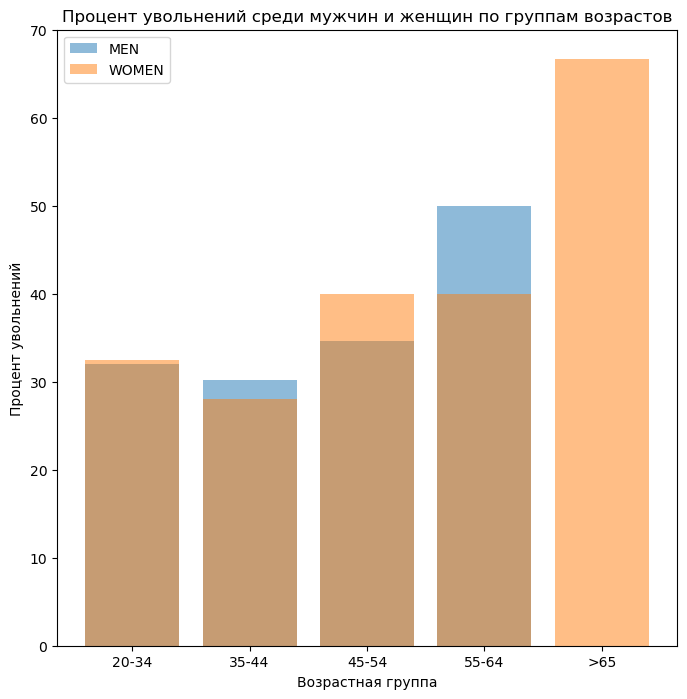

In [22]:
fig, ax = plt.subplots(figsize=(8,8))
ax.bar(data_group_age_men.group_age, data_group_age_men.percents, alpha=0.5, label='MEN')
ax.bar(data_group_age_women.group_age, data_group_age_women.percents, alpha=0.5, label='WOMEN')
ax.set_xlabel('Возрастная группа')
ax.set_ylabel('Процент увольнений')
ax.set_title('Процент увольнений среди мужчин и женщин по группам возрастов')
plt.legend()
plt.show()

Наименьший процент увольнений сотрудников соответствует группе возрастов от 35 до 44 лет как у мужчин так и у женщин.

## * Зависимость причины увольнения от возраста

In [23]:
age_term_reason = pd.read_sql('''
                            (SELECT 
                             '20-35' AS group_age, 
                             "Reason For Term",
                             count("Employee Number")*100.0/(SELECT count("Employee Number") from hr_dataset) as count
                             FROM hr_dataset
                             WHERE "Reason For Term" !~ 'N/A' AND age < 35
                             GROUP BY group_age,"Reason For Term"
                             ORDER BY "Reason For Term")
                             UNION
                             (SELECT 
                             '35-44' AS group_age, 
                             "Reason For Term",
                             count("Employee Number")*100.0/(SELECT count("Employee Number") from hr_dataset) as count
                             FROM hr_dataset
                             WHERE "Reason For Term" !~ 'N/A' AND age >= 35 AND age < 45
                             GROUP BY group_age,"Reason For Term"
                             ORDER BY "Reason For Term")
                             UNION
                             (SELECT 
                             '45-54' AS group_age, 
                             "Reason For Term",
                             count("Employee Number")*100.0/(SELECT count("Employee Number") from hr_dataset) as count
                             FROM hr_dataset
                             WHERE "Reason For Term" !~ 'N/A' AND age >= 45 AND age < 55
                             GROUP BY group_age,"Reason For Term"
                             ORDER BY "Reason For Term")
                             UNION
                             (SELECT 
                             '55-64' AS group_age, 
                             "Reason For Term",
                             count("Employee Number")*100.0/(SELECT count("Employee Number") from hr_dataset) as count
                             FROM hr_dataset
                             WHERE "Reason For Term" !~ 'N/A' AND age >= 55 AND age < 65
                             GROUP BY group_age,"Reason For Term"
                             ORDER BY "Reason For Term")
                             UNION
                             (SELECT 
                             '>65' AS group_age, 
                             "Reason For Term",
                             count("Employee Number")*100.0/(SELECT count("Employee Number") from hr_dataset) as count
                             FROM hr_dataset
                             WHERE "Reason For Term" !~ 'N/A' AND age >= 65 
                             GROUP BY group_age,"Reason For Term"
                             ORDER BY "Reason For Term")
                             ORDER BY group_age
                           ''', conn)

age_term_reason

,group_age,Reason For Term,count
0,20-35,Another position,1.612903
1,20-35,maternity leave - did not return,0.967742
2,20-35,medical issues,0.967742
3,20-35,career change,1.290323
4,20-35,"no-call, no-show",0.645161
5,20-35,performance,0.645161
6,20-35,more money,1.290323
7,20-35,military,0.322581
8,20-35,attendance,0.967742
9,20-35,unhappy,1.290323


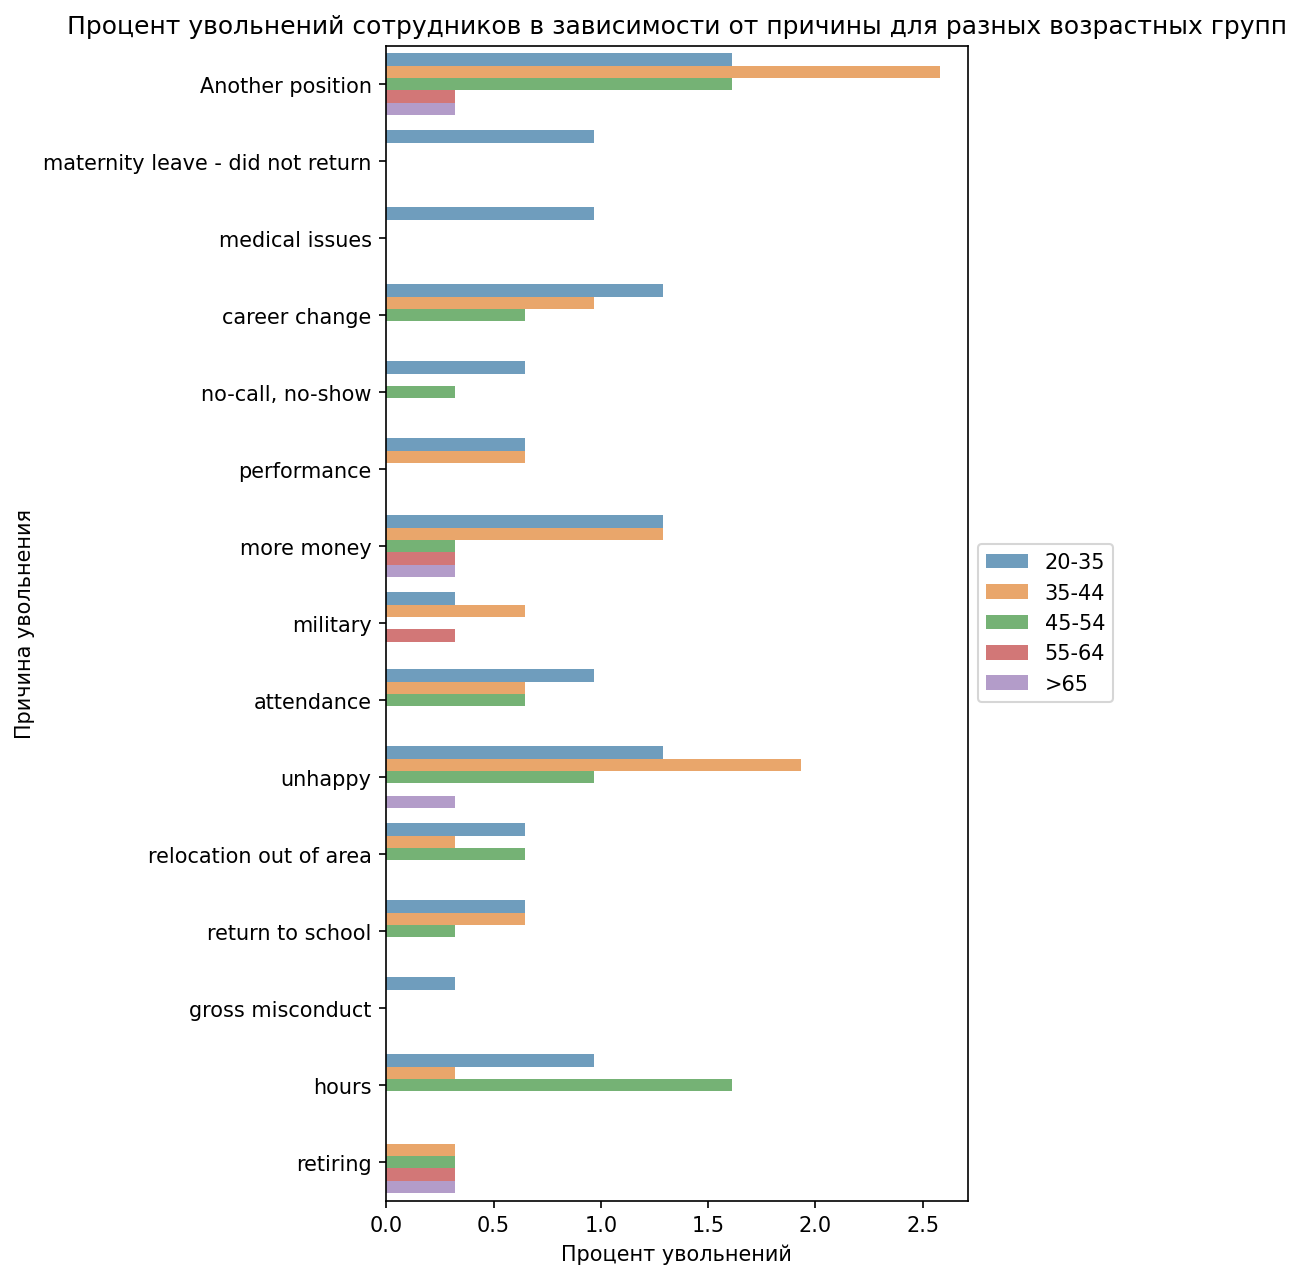

In [24]:
fig, ax = plt.subplots(figsize=(5, 10), dpi=150)
sns.barplot(data=age_term_reason, y='Reason For Term', x='count', ax=ax, orient ='h', hue = 'group_age', alpha=0.7)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel('Процент увольнений')
ax.set_ylabel('Причина увольнения')
ax.set_title('Процент увольнений сотрудников в зависимости от причины для разных возрастных групп')

plt.show()


* Для группы людей младше 35 основные причины увольнения это в первую очередь предложение другой позиции, далее идут смена карьеры, недостаточный заработок, и чувство несчастья
* Для людей в категории 35-44 лет основные причины это смена позиции, и чувство несчастья
* Для 45-54 лет также основная причина - это смена позиции, но также количество рабочих часов
* Для людей в категории 55-64 лет причины: смена позиции, недостаточный заработок, военная служба и выход на пенсию
* Для людей старше 65 лет причины: смена позиции, недостаточный заработок, чувство несчастья и выход на пенсию
* Итог, основная причина увольнений - смена позиции 

In [25]:
data_group_age_men_score = pd.read_sql('''(SELECT 
                     '20-34' AS group_age, 
                     AVG("perf_scoreid") AS avg_score
                     FROM hr_dataset
                     WHERE age < 35 AND genderid = 1 AND "perf_scoreid" != 9 AND "perf_scoreid" != 0 
                     GROUP BY group_age)
                     UNION
                     (SELECT '35-44' AS group_age, 
                     AVG("perf_scoreid") AS avg_score
                     FROM hr_dataset
                     WHERE age >= 35 AND age < 45 AND genderid = 1 AND "perf_scoreid" != 9 AND "perf_scoreid" != 0 
                     GROUP BY group_age)
                     UNION
                     (SELECT '45-54' AS group_age, 
                     AVG("perf_scoreid") AS avg_score
                     FROM hr_dataset
                     WHERE age >= 45 AND age < 55 AND genderid = 1 AND "perf_scoreid" != 9 AND "perf_scoreid" != 0 
                     GROUP BY group_age)
                     UNION
                     (SELECT '55-64' AS group_age, 
                     AVG("perf_scoreid") AS avg_score
                     FROM hr_dataset
                     WHERE age >= 55 AND age < 65 AND genderid = 1 AND "perf_scoreid" != 9 AND "perf_scoreid" != 0 
                     GROUP BY group_age)
                     UNION
                     (SELECT '>65' AS group_age, 
                     AVG("perf_scoreid") AS avg_score 
                     FROM hr_dataset
                     WHERE age >= 65 AND genderid = 1 AND "perf_scoreid" != 9 AND "perf_scoreid" != 0 
                     GROUP BY group_age)
                     ORDER BY group_age
                     ''', conn)

data_group_age_women_score = pd.read_sql('''(SELECT 
                     '20-34' AS group_age, 
                     AVG("perf_scoreid") AS avg_score
                     FROM hr_dataset
                     WHERE age < 35 AND genderid = 0 AND "perf_scoreid" != 9 AND "perf_scoreid" != 0 
                     GROUP BY group_age)
                     UNION
                     (SELECT '35-44' AS group_age, 
                     AVG("perf_scoreid") AS avg_score 
                     FROM hr_dataset
                     WHERE age >= 35 AND age < 45 AND genderid = 0 AND "perf_scoreid" != 9 AND "perf_scoreid" != 0 
                     GROUP BY group_age)
                     UNION
                     (SELECT '45-54' AS group_age, 
                     AVG("perf_scoreid") AS avg_score 
                     FROM hr_dataset
                     WHERE age >= 45 AND age < 55 AND genderid = 0 AND "perf_scoreid" != 9 AND "perf_scoreid" != 0 
                     GROUP BY group_age)
                     UNION
                     (SELECT '55-64' AS group_age, 
                     AVG("perf_scoreid") AS avg_score 
                     FROM hr_dataset
                     WHERE age >= 55 AND age < 65 AND genderid = 0 AND "perf_scoreid" != 9 AND "perf_scoreid" != 0 
                     GROUP BY group_age)
                     UNION
                     (SELECT '>65' AS group_age, 
                     AVG("perf_scoreid") AS avg_score 
                     FROM hr_dataset
                     WHERE age >= 65 AND genderid = 0 AND "perf_scoreid" != 9 AND "perf_scoreid" != 0 
                     GROUP BY group_age)
                     ORDER BY group_age
                     ''', conn)
data_group_age_women_score

,group_age,avg_score
0,20-34,3.020000
1,35-44,3.071429
2,45-54,3.233333
3,55-64,3.000000
4,>65,3.000000


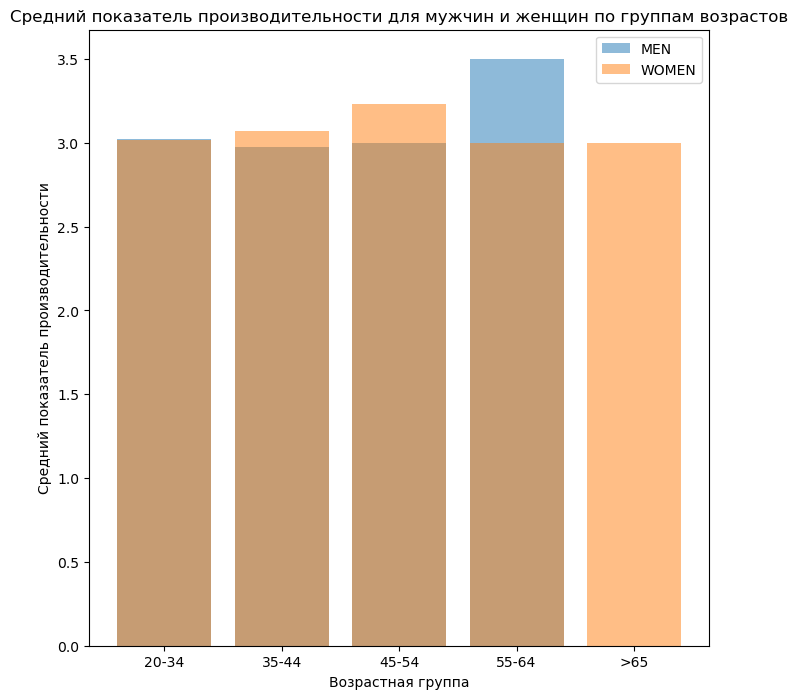

In [26]:
fig, ax = plt.subplots(figsize=(8,8))
ax.bar(data_group_age_men_score.group_age, data_group_age_men_score.avg_score, alpha=0.5, label='MEN')
ax.bar(data_group_age_women_score.group_age, data_group_age_women_score.avg_score, alpha=0.5, label='WOMEN')
ax.set_xlabel('Возрастная группа')
ax.set_ylabel('Средний показатель производительности')
ax.set_title('Средний показатель производительности для мужчин и женщин по группам возрастов')
plt.legend()
plt.show()

Вывод:
* Для женщин самое высокое значение среднего показателя производительности характерно в возрастной группе 45-54
* Для мужчин самое высокое значение среднего показателя производительности характерно в возрастной группе 55-64

# Определение зависимостей ключевых метрик c расовым типом, происхождением сотрудников, виду гражданства

 ## * Средний скор, количество отработанных дней, количество сотрудников и процент увольнений в зависимости от принадлежности к латинскому или испанскому происхождению

In [27]:
pd.read_sql('''SELECT "Hispanic/Latino", count("Employee Number") as employees, AVG("Days Employed") AS days,
                     count("Date of Termination")*100.0/(count("Employee Number")) as percent_of_term,
                     AVG(CASE WHEN hr_dataset.perf_scoreid > 0 AND hr_dataset.perf_scoreid < 9 THEN hr_dataset.perf_scoreid ELSE NULL END) AS avg_score
                     FROM hr_dataset 
                     WHERE
                     "Hispanic/Latino" LIKE 'No' OR "Hispanic/Latino" LIKE 'Yes'
                     GROUP BY "Hispanic/Latino"
                     ORDER BY employees DESC
                     ''',conn)

,Hispanic/Latino,employees,days,percent_of_term,avg_score
0,No,281,1284.380783,33.451957,3.058559
1,Yes,27,1322.185185,33.333333,3.000000


Вывод: показатели эффективности, такие как количество отработанных дней, процент увольнений и средний скор, не сильно зависят от происхождения

## * Показатели эффективности сотрудников по типу гражданства

In [28]:
pd.read_sql('''SELECT "citizendesc", count("Employee Number") as employees, AVG("Days Employed") AS days,
                     count("Date of Termination")*100.0/(count("Employee Number")) as percent_of_term,
                     AVG(CASE WHEN hr_dataset.perf_scoreid > 0 AND hr_dataset.perf_scoreid < 9 THEN hr_dataset.perf_scoreid ELSE NULL END) AS avg_score
                     FROM hr_dataset 
                     GROUP BY "citizendesc"
                     ORDER BY employees DESC
                     ''',conn)

,citizendesc,employees,days,percent_of_term,avg_score
0,US Citizen,294,1290.061224,32.312925,3.06087
1,Eligible NonCitizen,12,1514.083333,41.666667,2.87500
2,Non-Citizen,4,1084.500000,75.000000,3.00000


Вывод: 
* Сотрудники с гражданством США отличаются большей оценкой производительности и меньше подвержены увольнениям.
* Сотрудники без гражданства США характеризауются значительно большим процентом увольнений и коротким сроком работы.

## * Показатели эффективности сотрудников в зависимости от расовой пренадлежности сотрудника

In [29]:
pd.read_sql('''SELECT "racedesc", count("Employee Number") as employees, AVG("Days Employed") AS days,
                     count("Date of Termination")*100.0/(count("Employee Number")) as percent_of_term, 
                     AVG(CASE WHEN hr_dataset.perf_scoreid > 0 AND hr_dataset.perf_scoreid < 9 THEN hr_dataset.perf_scoreid ELSE NULL END) AS avg_score
                     FROM hr_dataset 
                     GROUP BY "racedesc"
                     ORDER BY employees DESC
                     ''',conn)

,racedesc,employees,days,percent_of_term,avg_score
0,White,193,1230.430052,34.715026,3.076389
1,Black or African American,57,1436.000000,29.824561,2.980000
2,Asian,34,1164.176471,32.352941,3.076923
3,Two or more races,18,1628.277778,38.888889,3.000000
4,American Indian or Alaska Native,4,1845.000000,0.000000,3.500000
5,Hispanic,4,1547.250000,25.000000,2.666667


 Вывод:
 * У сотрудников азиатской расы наблюдается наименьшее количество отработанных дней, однако в тоже время относительно высокий средний показатель производительности.
 * Худшей оценкой производительности обладают сотрудники испанского происхождения.
 * Наибольший процент увольнений приходится на сотрудников с принадлежностью к двум и более расам, в то же время им характерно наибольшее количество отработанных дней.
 * Наиболее высокие показатели производительности  и наименьший процент увольнений у сотрудников принадлежащих к расе американских индейцев и коренным жителям Аляски.

# Рекомендации по отбору сотрудников

Исследовав зависимости условных параметров сотрудников компании с метриками их эффективности можно заключить:

* Оптимальный возраст кандидата находится в диапазоне от 35 до 44 лет, как для мужчин так и для женщин.
* Рекомендуемое семейное положение для мужчин - живёт отдельно. Не рекомендуемое - вдовец или в разводе.
* Рекомендуемое семейное положение для женщин - живёт отдельно. Не рекомендуемое - вдова или в разводе.
* Рекомендуется наличие гражданства. Отсутствие гражданства не рекомендуется.
* Рекомендуемая раса - американские индейцы или коренные жители Аляски. Не рекомендуется нанимать на работу кандидатов с принадлежностью к двум и более расам

# Аналитика отделов компании

## * Количество работников в каждом из отделов в зависимости от пола

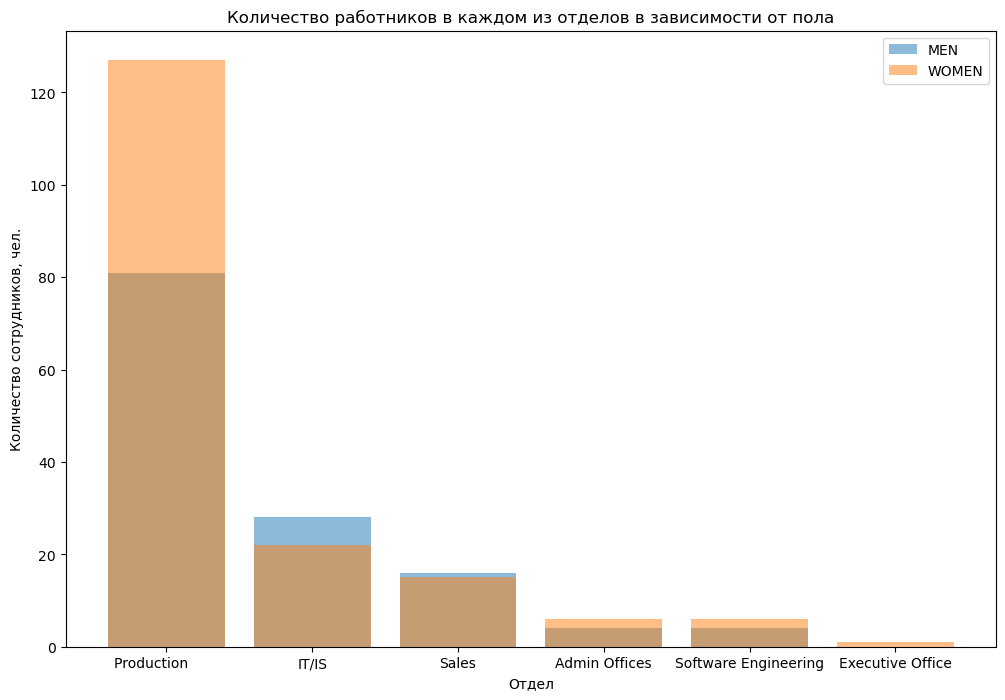

In [30]:
dep_emp = pd.read_sql_query('''SELECT department, 
                              count(CASE WHEN genderid = '1' THEN "Employee Number" ELSE NULL END) AS men,
                              count(CASE WHEN genderid = '0' THEN "Employee Number" ELSE NULL END) AS women
                              FROM hr_dataset
                              GROUP BY department
                              ORDER BY men DESC''', conn)

fig, ax = plt.subplots(figsize=(12,8))

ax_1 = ax.bar(dep_emp['department'], dep_emp['men'], alpha=0.5, label='MEN')
ax_2 = ax.bar(dep_emp['department'], dep_emp['women'], alpha=0.5, label='WOMEN')
plt.legend()
plt.title('Количество работников в каждом из отделов в зависимости от пола')
plt.xlabel('Отдел')
plt.ylabel('Количество сотрудников, чел.')
plt.show()

Вывод:
* В отделе Production наибольшее количество сотрудников, в котором женщин больше, чем мужчин примерно на 40%. 
* Так же женщин больше в отелах Software Engineering и Admin Offices.
* Количество мужчин выше в отделе IT/IS.

## * Количество увольнений сотрудников в каждом отделе

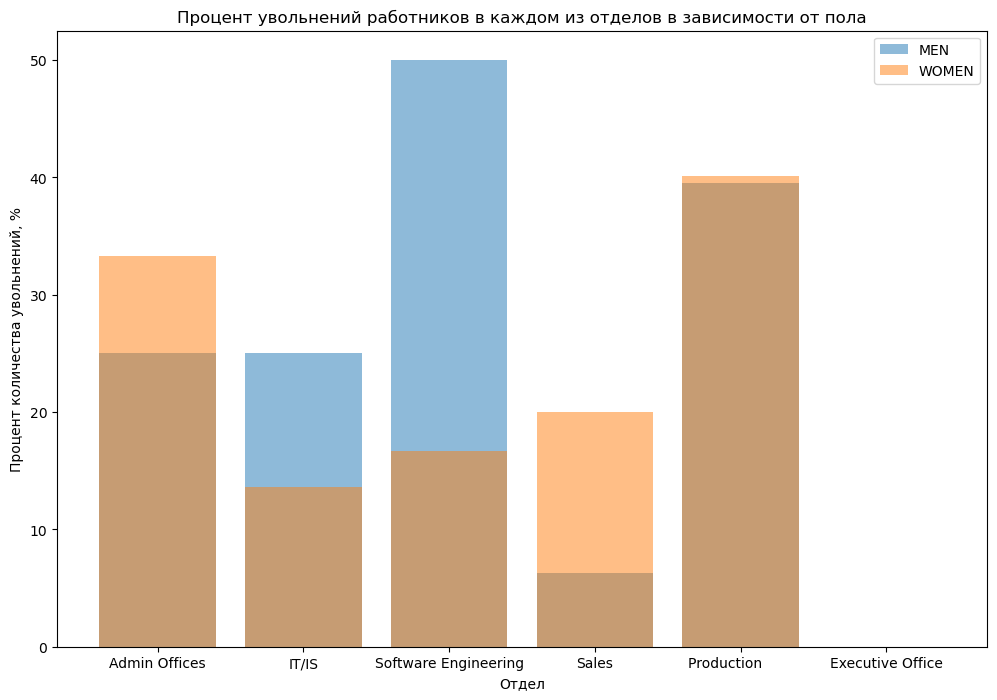

In [31]:
dep_term_men = pd.read_sql_query('''SELECT "department", 
                                  count("Date of Termination")/(count("Employee Number")*1.0)*100 AS percent_of_term 
                                  FROM hr_dataset 
                                  WHERE genderid = '1'
                                  GROUP BY department ''', conn)
dep_term_women = pd.read_sql_query('''SELECT "department",  
                                  count("Date of Termination")/(count("Employee Number")*1.0)*100 AS percent_of_term
                                  FROM hr_dataset 
                                  WHERE genderid = '0'
                                  GROUP BY department ''', conn)

fig, ax = plt.subplots(figsize=(12,8))

ax_1 = ax.bar(dep_term_men.department, dep_term_men.percent_of_term, alpha=0.5, label='MEN')
ax_2 = ax.bar(dep_term_women.department, dep_term_women.percent_of_term, alpha=0.5, label='WOMEN')
plt.legend()
plt.title('Процент увольнений работников в каждом из отделов в зависимости от пола')
plt.xlabel('Отдел')
plt.ylabel('Процент количества увольнений, %')
plt.show()

Вывод:
* Среди мужчин больше увольнений в отделах "Software Engineering" и "Production"
* Среди женщин больше увольнений в отделах "Admin Offices" и "Production"

## * Оплата труда и процент количества увольнений в каждом отделе

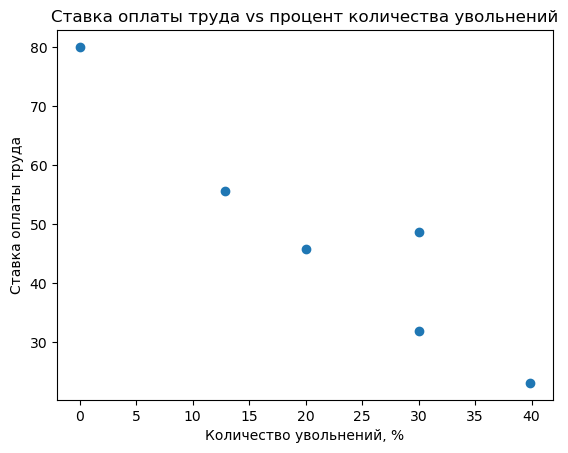

In [32]:
table_dep = pd.read_sql_query('''SELECT department, 
                     count("Employee Number") as employees, 
                     AVG("Days Employed") AS days,
                     count("Date of Termination")/(count("Employee Number")*1.0)*100.0 as percent_of_term,
                     AVG(CASE WHEN hr_dataset.perf_scoreid > 0 
                     AND hr_dataset.perf_scoreid < 9 THEN hr_dataset.perf_scoreid ELSE NULL END) AS avg_score,
                     AVG("Pay Rate") AS avg_pay_rate
                     FROM hr_dataset 
                     GROUP BY department
                     ''',conn)
fig, ax=plt.subplots()
ax.scatter(table_dep.percent_of_term, table_dep.avg_pay_rate)
ax.set_xlabel('Количество увольнений, %')
ax.set_ylabel('Ставка оплаты труда')
ax.set_title('Ставка оплаты труда vs процент количества увольнений')
plt.show()

Вывод: 
* Cуществует отрицательная зависимость между средним процентом увольнений и средней ставкой оплаты труда в отделе. Чем меньше ставка тем больше процент увольнений.

## * Корреляции между средними показателями эффективности работников на каждой позиции в компании

In [33]:
table_pos = pd.read_sql_query('''SELECT position, department, 
                     count("Employee Number") as employees, 
                     AVG("Days Employed") AS days,
                     count("Date of Termination")/(count("Employee Number")*1.0)*100.0 as percent_of_term,
                     AVG(CASE WHEN hr_dataset.perf_scoreid > 0 
                     AND hr_dataset.perf_scoreid < 9 THEN hr_dataset.perf_scoreid ELSE NULL END) AS avg_score,
                     AVG("Pay Rate") AS avg_pay_rate
                     FROM hr_dataset 
                     GROUP BY position, department
                     ''',conn)
table_pos

,position,department,employees,days,percent_of_term,avg_score,avg_pay_rate
0,IT Manager - Support,IT/IS,1,1421.000000,0.000000,4.000000,64.000000
1,Sr. Network Engineer,IT/IS,5,964.400000,0.000000,3.000000,54.460000
2,Sales Manager,Sales,3,1162.666667,33.333333,2.666667,56.750000
3,Director of Operations,Production,1,3247.000000,0.000000,4.000000,60.000000
4,IT Director,IT/IS,1,2417.000000,0.000000,5.000000,65.000000
5,BI Director,IT/IS,1,446.000000,0.000000,3.000000,63.500000
6,Production Technician I,Production,136,1359.750000,38.235294,3.018868,19.104485
7,IT Manager - DB,IT/IS,2,1583.000000,50.000000,3.000000,41.500000
8,Accountant I,Admin Offices,3,1963.666667,0.000000,3.000000,26.833333
9,Area Sales Manager,Sales,27,1684.407407,11.111111,2.875000,55.222222


In [34]:
table_pos.corr()

,employees,days,percent_of_term,avg_score,avg_pay_rate
employees,1.000000,-0.071197,0.281608,-0.099449,-0.458216
days,-0.071197,1.000000,-0.370448,0.419675,0.097368
percent_of_term,0.281608,-0.370448,1.000000,-0.187632,-0.313434
avg_score,-0.099449,0.419675,-0.187632,1.000000,0.234820
avg_pay_rate,-0.458216,0.097368,-0.313434,0.234820,1.000000


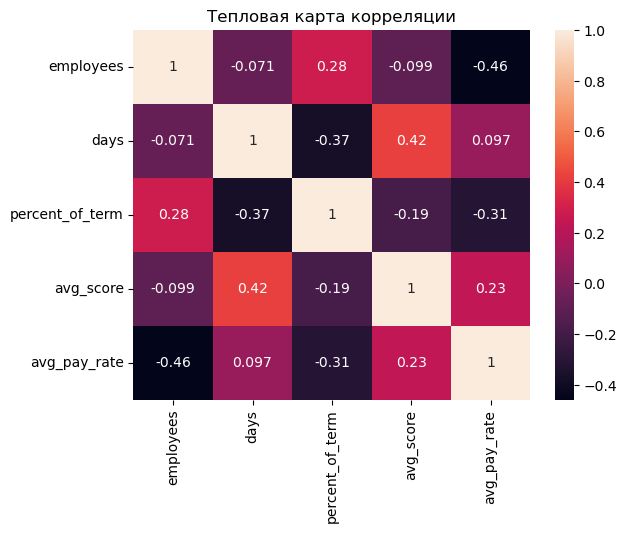

In [35]:
# Построим тепловую карту корреляции количества сотрудников на каждой позиции, среднего количества отработанных дней, процента увольнений для каждой позиции,
# среднего показателя производительности и средней заработной платы
fig, ax=plt.subplots()
sns.heatmap(table_pos.corr(), annot=True)
ax.set_title('Тепловая карта корреляции')
plt.show()

Вывод:
* Существует отрицательная связь между размером оплаты труда и количеством сотрудников на занимаемой доджности. Чем больше сотрудников тем меньше оплата.
* Также существует положительная связь между количеством отработанных дней и средним значением показателя производительности.
* Зависимость размера оплаты труда и оценки эффективности является слабой, но положительной. В то же время связь оплаты труда и процента увольнений является отрицательной.

In [36]:
pd.read_sql('''select sg."Position", 
                      sg."Hourly Min",
                      sg."Hourly Mid",
                      sg."Hourly Max",
                      selected_hr.*
                      from (
                            select 
                                hr."position" as "Position", 
                                AVG(hr."Pay Rate") as "pay_rate"
                            from hr_dataset hr
                            group by "Position") as selected_hr
                      join
                      salary_grid sg
                      ON sg."Position" = selected_hr."Position"
                      ''', conn)

,Position,Hourly Min,Hourly Mid,Hourly Max,Position,pay_rate
0,Administrative Assistant,14.42,19.23,24.04,Administrative Assistant,19.520000
1,Accountant I,20.32,24.72,29.95,Accountant I,26.833333
2,Sr. Accountant,30.42,37.01,44.45,Sr. Accountant,34.950001
3,Network Engineer,24.44,32.14,42.44,Network Engineer,39.677778
4,Sr. Network Engineer,38.19,47.82,57.91,Sr. Network Engineer,54.460000
5,Database Administrator,24.31,32.84,44.86,Database Administrator,39.476923
6,Sr. DBA,44.65,55.77,66.91,Sr. DBA,60.000000
7,Production Technician I,14.42,19.23,24.04,Production Technician I,19.104485
8,Production Technician II,18.27,23.08,27.88,Production Technician II,25.407719


Вывод: В колонке pay rate находятся средние значения почасовой оплаты труда в компании. Как видим, значения в основном превышают средние показатели из таблицы salary_grid

## * Средний показатель производительности работников у каждого менеджера

In [37]:
table_managers = pd.read_sql('''
                        SELECT
                        "Manager Name", array_agg(DISTINCT department) as dep,
                         count("Employee Number") as employees, 
                         AVG("Days Employed") AS days,
                         count("Date of Termination")/(count("Employee Number")*1.0)*100.0 as percent_of_term,
                         AVG(CASE WHEN hr_dataset.perf_scoreid > 0 
                         AND hr_dataset.perf_scoreid < 9 THEN hr_dataset.perf_scoreid ELSE NULL END) AS avg_score
                         FROM hr_dataset 
                         WHERE "Manager Name" != 'Board of Directors'
                         GROUP BY "Manager Name"
                         ORDER BY avg_score DESC
                    
                     ''',conn)

In [38]:
table_managers.head(5)

,Manager Name,dep,employees,days,percent_of_term,avg_score
0,Simon Roup,[IT/IS],17,679.176471,47.058824,3.500000
1,Alex Sweetwater,[Software Engineering],9,1320.333333,33.333333,3.285714
2,Jennifer Zamora,"[IT/IS, Software Engineering]",7,1693.714286,14.285714,3.285714
3,Eric Dougall,[IT/IS],4,2384.000000,0.000000,3.250000
4,Kelley Spirea,[Production ],22,1387.272727,27.272727,3.166667


In [39]:
table_managers.tail(5)

,Manager Name,dep,employees,days,percent_of_term,avg_score
15,Brandon R. LeBlanc,[Admin Offices],7,1233.285714,28.571429,3.000000
16,Kissy Sullivan,[Production ],22,1046.954545,54.545455,3.000000
17,Michael Albert,[Production ],22,1098.318182,40.909091,2.800000
18,John Smith,[Sales],14,1598.642857,21.428571,2.769231
19,Debra Houlihan,[Sales],3,1162.666667,33.333333,2.666667


Вывод: 
* Пятью менеджерами с высокой эффективностью являются Simon Roup, Alex Sweetwater, Jennifer Zamora, Eric Dougall, Kelley Spirea. Большинство из них работают в отделе IT/IS.
* Пятью менеджерами с низкой эффективностью являются Debra Houlihan, John Smith, Michael Albert, Kissy Sullivan, Brandon R. LeBlanc. Большинство из них работают в отделе Production.

# Вывод по аналитике компании
* Существует отрицательная взаимосвязь между ставкой оплаты труда и процентом увольнений.
* Так же существует отрицательная взаимосвязь между оплатой труда и количеством сотрудников в отделе.
* Самый неэффективный отдел в компании - Production. В нем наибольший процент увольнений.
* В отделе Software Engineering чаще увольняются мужчины немнотря на относительной высокий показатель производительности.
* В отделе Admin Offices чаще увольняются женщины.
* Большинство наименее успешных менеджеров работают в отделе Production. У менеджеров отдела Production самое большое количество подопечных. Возможно стоит в отдел Production нанять еще несколько менеджеров. 